In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,BatchNormalization,Dense,Flatten,Dropout,MaxPooling2D
import warnings
warnings.filterwarnings('ignore')

In [36]:
train = pd.read_csv("train.csv")
train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,151,156,155,153,153,157,161,161,161,...,68,64,61,63,59,57,56,53,54,2
49996,255,254,255,254,254,254,254,253,254,254,...,61,64,68,64,76,82,79,81,76,6
49997,35,40,42,39,43,45,48,51,53,56,...,94,104,103,96,93,87,77,66,50,9
49998,189,186,185,184,182,181,180,180,181,180,...,166,171,171,172,169,165,169,171,171,1


In [37]:
xtrain=train.drop(['label'],axis=1).values
ytrain= train['label'].values

In [38]:
xtrain.shape

(50000, 3072)

In [39]:
xtrain=xtrain.reshape(50000,32,32,3).astype('float32')/255

In [40]:
test=pd.read_csv('test.csv')
test

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,158,159,165,166,160,156,162,159,158,159,...,130,123,145,167,182,175,145,124,129,110
1,235,231,232,232,232,232,232,232,232,232,...,108,117,123,133,141,153,163,178,191,199
2,158,158,139,132,166,182,187,193,199,205,...,45,46,44,44,43,52,37,8,3,7
3,155,167,176,190,177,166,168,166,170,179,...,52,55,70,103,105,72,53,50,52,50
4,65,70,48,30,23,40,44,45,45,40,...,102,127,156,139,131,130,147,136,146,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,76,77,76,75,76,76,76,76,78,...,228,185,177,223,239,239,235,236,234,236
9996,81,91,98,106,108,110,80,84,88,90,...,126,107,143,155,156,160,173,129,147,160
9997,20,19,15,15,14,13,12,11,10,9,...,114,112,68,50,52,52,51,50,53,47
9998,25,15,23,17,23,51,74,91,114,137,...,87,84,83,84,79,78,78,80,81,80


In [41]:
model= Sequential(
    [
        Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'),
        BatchNormalization(),
        Conv2D(64,(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(64,activation='relu'),
        Dropout(0.2),
        Dense(10,activation='softmax')
    ]
)

sgd=SGD(learning_rate=0.1)
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 823,050 (3.14 MB)

 Trainable params: 822,986 (3.14 MB)

 Non-trainable params: 64 (256.00 B)

In [42]:
r=model.fit(xtrain,ytrain,validation_split=0.2,epochs=11,batch_size=64)

Epoch 1/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.2573 - loss: 2.1355 - val_accuracy: 0.4661 - val_loss: 1.4828
Epoch 2/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.4347 - loss: 1.5455 - val_accuracy: 0.5368 - val_loss: 1.3001
Epoch 3/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.5091 - loss: 1.3652 - val_accuracy: 0.5500 - val_loss: 1.2824
Epoch 4/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.5574 - loss: 1.2477 - val_accuracy: 0.5825 - val_loss: 1.2195
Epoch 5/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.5914 - loss: 1.1406 - val_accuracy: 0.6046 - val_loss: 1.1353
Epoch 6/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.6237 - loss: 1.0562 - val_accuracy: 0.6016 - val_loss: 1.1424
Epoch 7/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.6516 - loss: 0.9741 - val_accuracy: 0.6049 - val_loss: 1.1265
Epoch 8/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.6785 - loss: 0.9020 - 

In [44]:
xtest=test.values

In [45]:
xtest=xtest.reshape(10000,32,32,3).astype('float32')/255

In [46]:
predictions=model.predict(xtest)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[7.4534267e-02, 1.1207146e-02, 4.3791658e-01, ..., 9.5114727e-03,
        1.1134358e-01, 2.1452000e-02],
       [1.0968981e-01, 2.4731806e-01, 8.5660846e-05, ..., 6.4053745e-07,
        4.6465591e-01, 1.7819898e-01],
       [6.4063656e-01, 5.1059574e-02, 9.7652758e-03, ..., 4.9474677e-03,
        1.6373040e-01, 1.0110933e-01],
       ...,
       [2.5352754e-04, 1.2052760e-07, 7.2241157e-01, ..., 2.7620995e-02,
        6.9838524e-07, 1.7128424e-06],
       [4.0422541e-01, 4.4178385e-02, 1.0811539e-01, ..., 9.8940833e-03,
        3.1830855e-02, 3.4092661e-02],
       [2.0329413e-05, 7.3543021e-07, 1.6418056e-05, ..., 9.8912674e-01,
        3.4136793e-08, 1.5182039e-06]], dtype=float32)

In [47]:
r.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

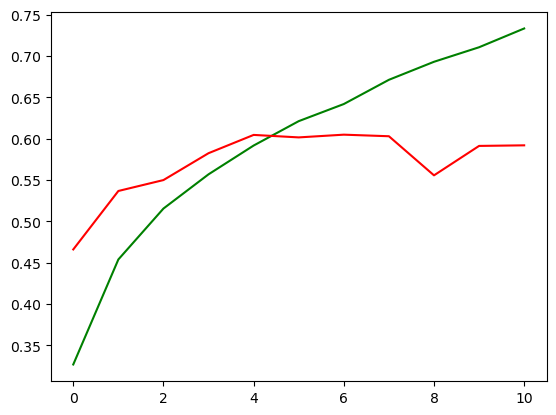

In [48]:
plt.plot(r.history['accuracy'],label = 'acc',color='green')
plt.plot(r.history['val_accuracy'], label = 'val_acc', color='red')
plt.show()

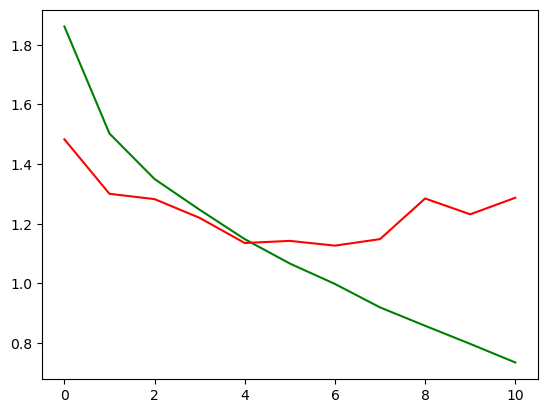

In [49]:
plt.plot(r.history['loss'],label='loss',color='green')
plt.plot(r.history['val_loss'],label='val_loss',color='red')